In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from label import label
df = label('../binance-BTCUSDT-1m.csv', t=15)

In [11]:
df.index = pd.to_datetime(df['Time_UTC_Start'])

In [12]:
df.head()

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Time_UTC_Start,,,,,,,,,,,,
2018-07-18 10:39:00,7370.00,7404.23,7365.10,7402.13,421.446875,1531911239999,3.112218e+06,2210,244.531743,1.805624e+06,2018-07-18 10:39:00,1.0
2018-07-18 10:54:00,7404.23,7419.09,7393.03,7398.00,400.220193,1531912139999,2.963666e+06,2825,217.698269,1.612081e+06,2018-07-18 10:54:00,0.0
2018-07-18 11:09:00,7397.00,7413.67,7388.97,7401.99,283.424582,1531913039999,2.097944e+06,2022,158.367674,1.172256e+06,2018-07-18 11:09:00,1.0
2018-07-18 11:24:00,7401.99,7433.32,7395.00,7430.33,385.377189,1531913939999,2.858399e+06,2194,230.656692,1.711215e+06,2018-07-18 11:24:00,1.0
2018-07-18 11:39:00,7430.33,7433.58,7408.07,7418.00,412.557017,1531914839999,3.061536e+06,2352,231.403556,1.717226e+06,2018-07-18 11:39:00,0.0


In [13]:
df1 = df.asfreq('3D')

In [14]:
df1 = df1.fillna(method = "ffill")

In [15]:
decomp = seasonal_decompose(x=df1.Close, model='additive')

In [16]:
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

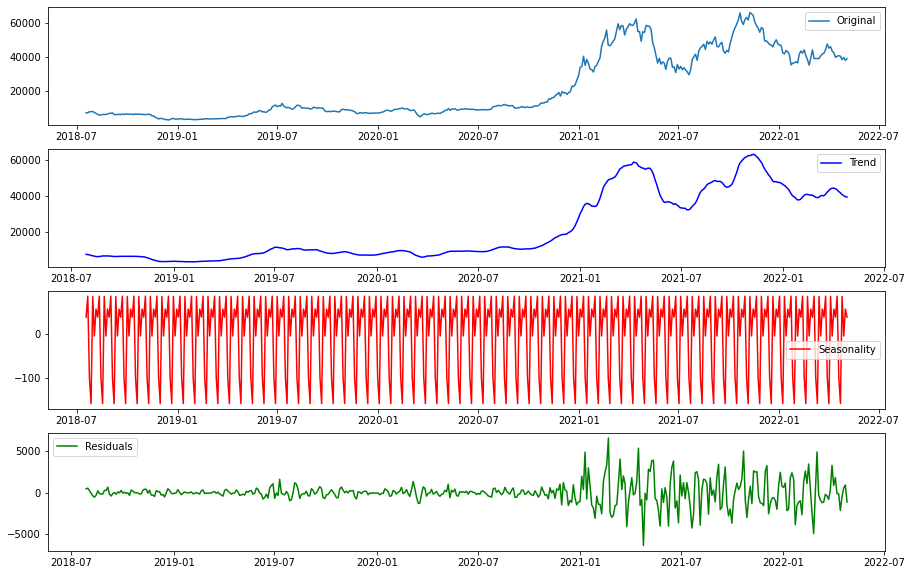

In [17]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df1.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  2.,  2.,  0.,  1.,
         3.,  6.,  2.,  7.,  3., 10., 12., 13., 20., 28., 67., 99., 66.,
        31., 14., 11., 11.,  5.,  6.,  3.,  2.,  9.,  1.,  3.,  5.,  0.,
         3.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-6389.73046696, -6129.71335268, -5869.69623839, -5609.6791241 ,
        -5349.66200982, -5089.64489553, -4829.62778125, -4569.61066696,
        -4309.59355268, -4049.57643839, -3789.5593241 , -3529.54220982,
        -3269.52509553, -3009.50798125, -2749.49086696, -2489.47375268,
        -2229.45663839, -1969.4395241 , -1709.42240982, -1449.40529553,
        -1189.38818125,  -929.37106696,  -669.35395268,  -409.33683839,
         -149.3197241 ,   110.69739018,   370.71450447,   630.73161875,
          890.74873304,  1150.76584732,  1410.78296161,  1670.8000759 ,
         1930.81719018,  2190.83430447,  2450.85141875,  2710.86853304,
         2970.88564732,  3230.90276161,  3490.9198759 ,  3750.936990

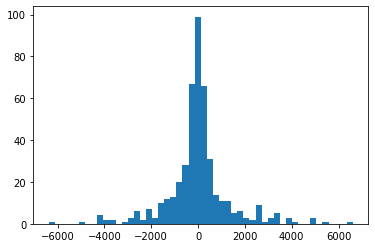

In [18]:
plt.hist(decomp.resid, bins = 50)

In [19]:
df2 = df.asfreq('7D')
df2 = df2.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df2.Close, model='additive')
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

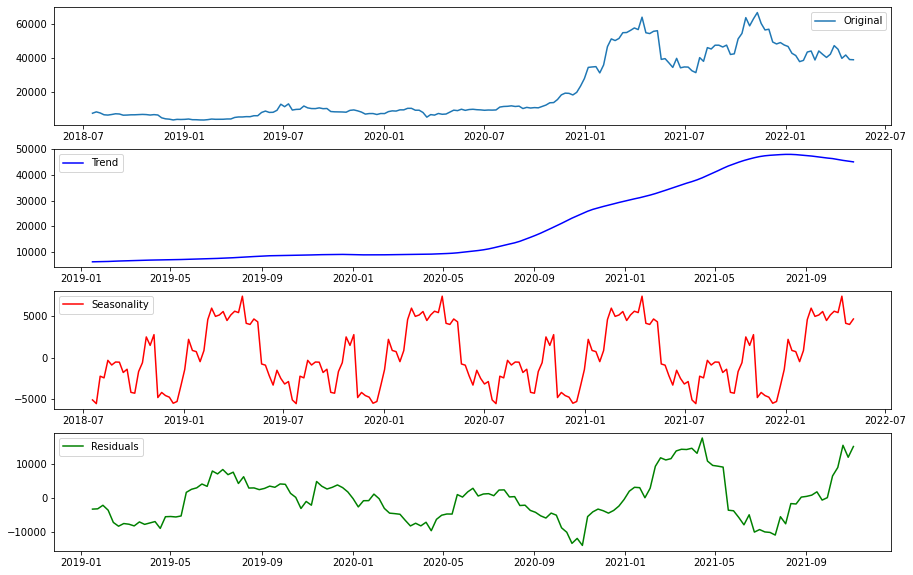

In [20]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df2.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

In [21]:
test = est_trend + est_seasonal + est_residual

In [48]:
df3 = df.asfreq('3600s')
df3 = df3.fillna(method = "ffill")
decomp2 = seasonal_decompose(x=df3.Close, model='additive', two_sided=False)
est_trend = decomp2.trend
est_seasonal = decomp2.seasonal
est_residual = decomp2.resid

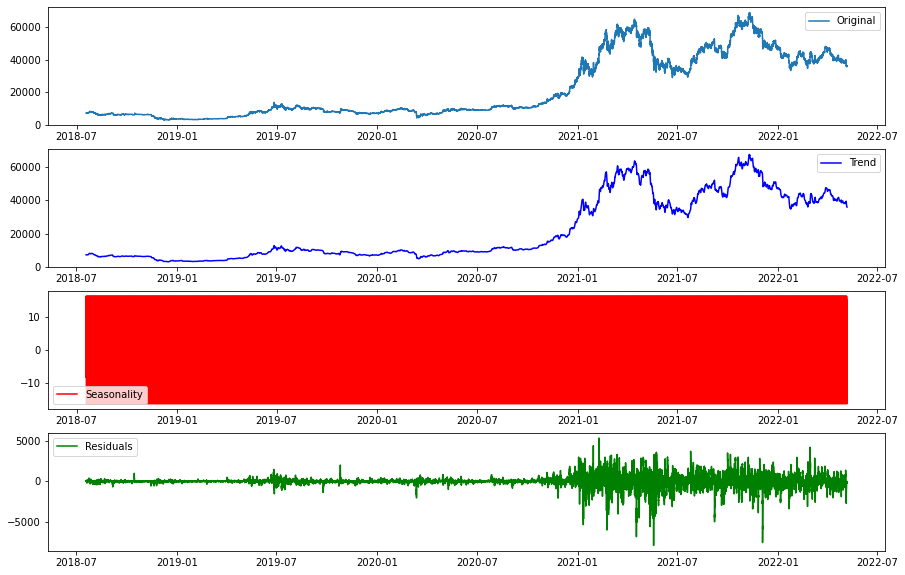

In [49]:
fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(df3.Close, label='Original')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

(array([3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 5.000e+00, 1.000e+01, 1.300e+01, 2.700e+01,
        3.000e+01, 6.900e+01, 8.500e+01, 1.230e+02, 2.060e+02, 3.160e+02,
        6.020e+02, 1.198e+03, 6.545e+03, 2.072e+04, 1.603e+03, 7.010e+02,
        3.560e+02, 2.260e+02, 1.510e+02, 9.600e+01, 5.800e+01, 5.000e+01,
        3.400e+01, 2.000e+01, 9.000e+00, 1.100e+01, 1.000e+01, 4.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-82631.22324198, -78723.02792434, -74814.83260671, -70906.63728907,
        -66998.44197144, -63090.2466538 , -59182.05133617, -55273.85601853,
        -51365.6607009 , -47457.46538326, -43549.27006563, -39641.07474799,
        -35732.87943036, -31824.68411272, -27916.48879509, -24008.29347745,
        -20100.09815982, -16191.90284218, -12283.70752455,  -8375.512206

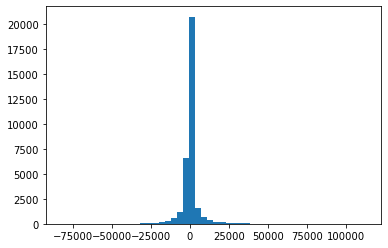

In [50]:
plt.hist((est_residual * est_seasonal).dropna(), bins = 50)

In [57]:
preprocessing.StandardScaler().fit_transform([est_residual])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


array([[nan, nan, nan, ...,  0.,  0.,  0.]])

In [64]:
est_residual.dropna(inplace=True)

In [85]:
residual = ((est_residual <= 645.5928791169954 * 3) * (est_residual >= -645.5928791169954 * 3) * est_residual).fillna(method='ffill')

(array([  53.,   52.,   56.,   50.,   75.,   74.,   88.,  101.,  107.,
         130.,  142.,  157.,  159.,  211.,  214.,  240.,  291.,  323.,
         417.,  533.,  705.,  838., 1388., 2384., 7320., 7209., 2709.,
        1610., 1018.,  686.,  536.,  422.,  385.,  351.,  318.,  262.,
         237.,  208.,  189.,  159.,  151.,  123.,  101.,   92.,  105.,
          82.,   76.,   66.,   60.,   47.]),
 array([-1.93657876e+03, -1.85911401e+03, -1.78164927e+03, -1.70418452e+03,
        -1.62671977e+03, -1.54925502e+03, -1.47179027e+03, -1.39432552e+03,
        -1.31686077e+03, -1.23939602e+03, -1.16193127e+03, -1.08446653e+03,
        -1.00700178e+03, -9.29537028e+02, -8.52072279e+02, -7.74607530e+02,
        -6.97142781e+02, -6.19678032e+02, -5.42213283e+02, -4.64748535e+02,
        -3.87283786e+02, -3.09819037e+02, -2.32354288e+02, -1.54889539e+02,
        -7.74247902e+01,  3.99586686e-02,  7.75047075e+01,  1.54969456e+02,
         2.32434205e+02,  3.09898954e+02,  3.87363703e+02,  4.648284

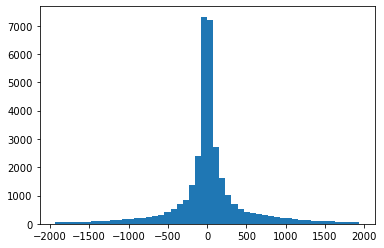

In [69]:
plt.hist(residual, bins=50)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20640\3452072264.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.ravel(x).astype(np.float)


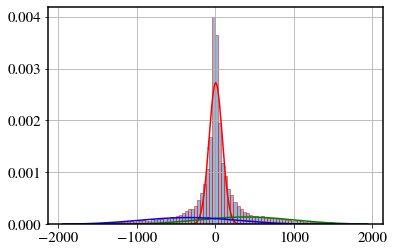

In [101]:
from matplotlib import rc
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

# x = open("prueba.dat").read().splitlines()

# create the data
x = residual.to_numpy()

f = np.ravel(x).astype(np.float)
f=f.reshape(-1,1)
g = mixture.GaussianMixture(n_components=3, covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_
plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

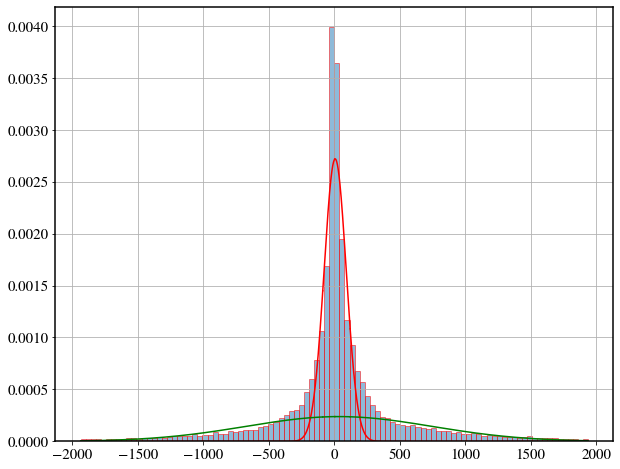

In [99]:
plt.figure(figsize=(10,8))
plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [52]:
est_residual.mean()

10.300197921746157

In [55]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(est_seasonal.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -21586489906160.691406
p-value: 0.000000


In [41]:
0.0004728373669439642**1/2

0.0002364186834719821

In [35]:
est_residual.mean()

1.0006932457951414

In [45]:
random = np.random.normal(1.0006932457951414, 0.021744823911541894, size=len(est_residual))

(array([7.000e+00, 8.000e+00, 1.200e+01, 1.300e+01, 3.200e+01, 4.300e+01,
        6.600e+01, 1.120e+02, 1.680e+02, 2.260e+02, 3.140e+02, 4.800e+02,
        5.300e+02, 7.090e+02, 8.910e+02, 1.065e+03, 1.268e+03, 1.453e+03,
        1.667e+03, 1.852e+03, 1.937e+03, 2.049e+03, 2.064e+03, 2.025e+03,
        2.060e+03, 1.864e+03, 1.722e+03, 1.605e+03, 1.345e+03, 1.213e+03,
        1.026e+03, 8.610e+02, 6.880e+02, 5.340e+02, 4.330e+02, 3.020e+02,
        2.330e+02, 1.510e+02, 1.170e+02, 6.600e+01, 4.700e+01, 2.700e+01,
        1.400e+01, 1.200e+01, 1.000e+01, 4.000e+00, 5.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.92270055, 0.9261026 , 0.92950466, 0.93290671, 0.93630876,
        0.93971082, 0.94311287, 0.94651493, 0.94991698, 0.95331904,
        0.95672109, 0.96012314, 0.9635252 , 0.96692725, 0.97032931,
        0.97373136, 0.97713342, 0.98053547, 0.98393752, 0.98733958,
        0.99074163, 0.99414369, 0.99754574, 1.0009478 , 1.00434985,
        1.0077519 , 1.01115396, 1.01

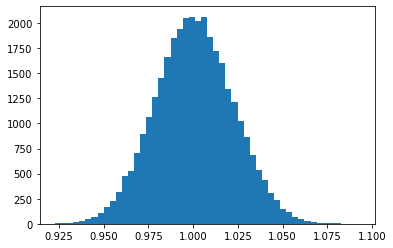

In [47]:
plt.hist(random, bins=50)

In [61]:
data = (est_seasonal + est_trend).dropna()

In [62]:
data

Time_UTC_Start
2018-07-19 10:39:00     7369.600747
2018-07-19 11:39:00     7365.312224
2018-07-19 12:39:00     7369.067980
2018-07-19 13:39:00     7389.943591
2018-07-19 14:39:00     7377.053406
                           ...     
2022-05-07 03:39:00    36064.844066
2022-05-07 04:39:00    36039.711329
2022-05-07 05:39:00    36017.114902
2022-05-07 06:39:00    35996.475333
2022-05-07 07:39:00    35977.091807
Freq: 3600S, Length: 33310, dtype: float64

In [63]:
data = data - data.shift(1)

In [64]:
old_data = df3.Close - df3.Close.shift(1)

In [65]:
((data[1:] * old_data[1:]) >= 0).sum()/len(data[1:])

0.5251733765648924

In [66]:
data =(data[1:] >= 0) * 1

In [67]:
data = pd.DataFrame(data, columns={'label'})

In [68]:
data.to_csv('./new_label.csv', index=True)

In [69]:
data

,label
Time_UTC_Start,
2018-07-19 11:39:00,0
2018-07-19 12:39:00,1
2018-07-19 13:39:00,1
2018-07-19 14:39:00,0
2018-07-19 15:39:00,0
...,...
2022-05-07 03:39:00,0
2022-05-07 04:39:00,0
2022-05-07 05:39:00,0


In [56]:
est_residual_ = pd.DataFrame(est_residual)

In [58]:
est_residual_.to_csv('./residual.csv', index=True)

In [59]:
est_residual_

,resid
Time_UTC_Start,
2018-07-18 10:39:00,NaN
2018-07-18 11:39:00,NaN
2018-07-18 12:39:00,NaN
2018-07-18 13:39:00,NaN
2018-07-18 14:39:00,NaN
...,...
2022-05-07 03:39:00,-175.444066
2022-05-07 04:39:00,-220.661329
2022-05-07 05:39:00,-158.834902


In [4]:
S = df['Close']

In [6]:
R = S / S.shift(1) - 1

In [8]:
R.dropna(inplace=True)

(array([3.00000e+00, 1.10000e+01, 6.51000e+02, 1.32492e+05, 1.68000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-0.1322372 , -0.09313428, -0.05403136, -0.01492844,  0.02417448,
         0.0632774 ,  0.10238032,  0.14148324,  0.18058616,  0.21968908,
         0.258792  ]),
 <BarContainer object of 10 artists>)

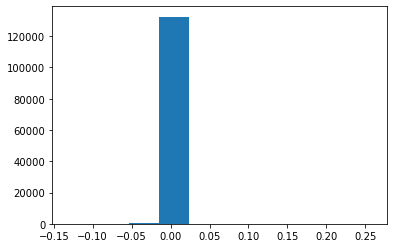

In [10]:
plt.hist(R)